<a href="https://colab.research.google.com/github/diwashsapkota/DATA-SCIENCE-FROM-SCRATCH/blob/master/EDA_TitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"diwashsapkota019","key":"6c90e25797868ed97a1d53c3222710e2"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collision Data from SWITRS    1GB  2020-11-22 16:51:55            930  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51           2469  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57           1180  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44           4715  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Tu

In [7]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 10.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.17MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 50.9MB/s]


In [8]:
# Importing necessary libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# Reading in the data

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Finding the shape of the dataframe

df.shape

(891, 12)

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Checking for null values in the dataframe

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Checking for total null values per column

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, there are 177 missing values in ‘Age’ column, 687 missing values in ‘Cabin’ column and 2 missing values in ‘Embarked’ column.

In most real-life datasets, there can be a lot of missing values and there are different ways to fill in these missing values.


Types Of Features
By now, you must have already had a feel of the data. Therefore, it is the right time to talk about the different types of features you are looking at.

Numerical/Continuous features: A feature is said to be numerical or continuous if it can take values between any two points or between the minimum or maximum values in the features column. For example, ‘Age’ is a continuous feature in the dataset.

Categorical features: A categorical feature is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). ‘Sex’ and ‘Embarked’ are categorical features in the dataset.

Ordinal features: An ordinal feature is similar to categorical features, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is an ordinal variable. ‘PClass’ is an ordinal feature in the dataset.

DateTime features: A feature is said to be a DateTime feature if the feature holds DateTime values. For example, a feature with the value ‘2020/02/01 01:01:00″ is a DateTime feature. There are no DateTime features in the given dataset.

Co-ordinate features: A feature is said to be a co-ordinate feature if the feature holds co-ordinate values. For example, a feature with the value ‘(27.7172, 85.3240)’ is a co-ordinate feature. There are no co-ordinate features in the given dataset.

Frequency features: A feature is said to be a frequency feature if the feature holds a count of items as its value. For example, a feature with the value ‘200’ is a frequency feature if it represents the count of 200 people who are on the Titanic. ‘SibSp’ is a frequency feature.

Now that we have understood a bit more about the data, it is time to perform some in-depth analysis. In this chapter we will be finding the survival distribution of passengers relative to various features.

First, let us look at the distribution of survivors (1) vs non-survivors (0). The value_counts() method can provide us with the frequency of occurrence of unique values of our target column.



In [14]:
# Finding the frequency count of survivors (1) and non-survivors (0)

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

There looks to be a 38% survival rate, i.e., 549 passengers lost their lives during the sinking of the Titanic whereas 342 passengers survived.

**Analyzing the survival distribution of passengers according to their features**

a. Gender



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


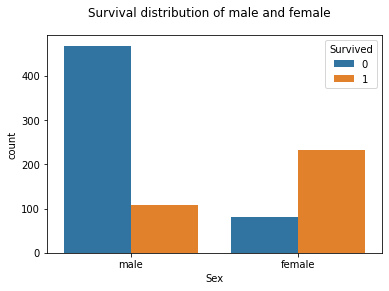

In [15]:
# Plotting the number of survivors and non-survivors according to gender

fig = plt.figure()
sns.countplot('Sex', hue='Survived', data=df)
fig.suptitle('Survival distribution of male and female')
plt.show()

b. Pclass

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


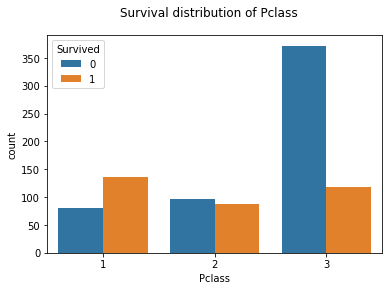

In [16]:
# Plotting the number of survivors and non-survivors according to Pclass

fig = plt.figure()
sns.countplot('Pclass', hue='Survived', data=df)
fig.suptitle('Survival distribution of Pclass')
plt.show()

c. SibSp

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


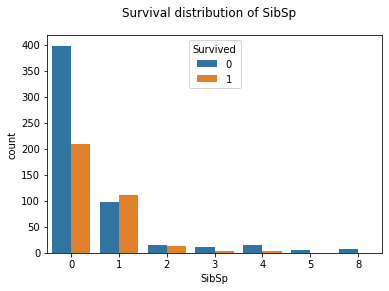

In [17]:
# Plotting the number of survivors and non-survivors according to SibSp

fig = plt.figure()
sns.countplot('SibSp', hue='Survived', data=df)
fig.suptitle('Survival distribution of SibSp')
plt.show()

d. Embarked

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


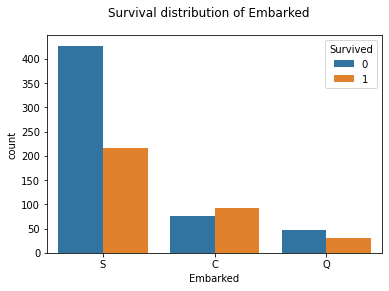

In [18]:
# Plotting the number of survivors and non-survivors according to Embarked

fig = plt.figure()
sns.countplot('Embarked', hue='Survived', data=df)
fig.suptitle('Survival distribution of Embarked')
plt.show()

e. Parch

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


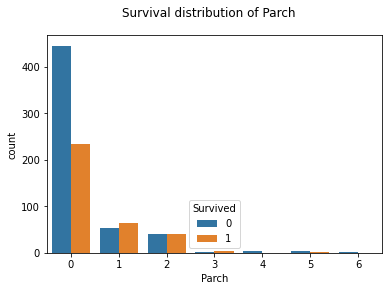

In [19]:
# Plotting the number of survivors and non-survivors according to Parch

fig = plt.figure()
sns.countplot('Parch', hue='Survived', data=df)
fig.suptitle('Survival distribution of Parch')
plt.show()

**Analyzing the relationship behind ‘Pclass’ and ‘Fare’**

As mentioned above, the ‘Pclass’ column represents the class of ticket purchased by a passenger. It would be nice to understand what is the mean price for fare prices in the various ticket classes.

In [20]:
# Grouping the data by 'Pclass' and finding the mean of 'Fare' in each group

df.groupby(['Pclass'])[['Fare']].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [21]:
# Grouping the data by 'Pclass', 'Sex' and 'Survived' and finding the count of 'Sex' in each group
# Also, renaming the outermost column name from 'Sex' to 'Count'

df.groupby(['Pclass','Sex','Survived'])[['Sex']].count().rename(columns={'Sex':'Count'})

Count
Pclass Sex    Survived       
1      female 0             3
              1            91
       male   0            77
              1            45
2      female 0             6
              1            70
       male   0            91
              1            17
3      female 0            72
              1            72
       male   0           300
              1            47

First, let us take a look at the survival distribution of female per Pclass. If you look closely, in ‘Pclass 1’ almost all the female survived except 3. Similarly, in ‘Pclass 2’ almost all the female survived except 6. However, in ‘Pclass 3’ there is an equal distribution of female survivors/non-survivors, i.e. 72/72. With this information, we can certainly say that the survival rate of female passengers is biased by the ticket class they are in.

Next, let us look at the survival distribution of male per Pclass. In this case, the pattern isn’t quite distinguishable but if you take the total number of male passengers in account, it certainly becomes easier. In ‘Pclass 1’, 77 male passengers lost their lives out of the total 122 (~63% mortality rate). Similarly, in ‘Pclass 2’, 91 male passengers lost their lives out of the total 108 (~84% mortality rate). Finally, in ‘Pclass 3’, 300 male passengers lost their lives out of the total 347 (~86% mortality rate). With this information, we can only say that the survival rate of male passengers is not biased by the ticket class they are in.

We successfully answered all three of our questions based on the available data. We know it is hard to write ‘maybe’ as an answer but we just don’t have the necessary amount of insight to give a bold ‘Yes’ or ‘No’ answer.

